In [176]:
import uproot
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import concurrent.futures, multiprocessing
ncpu = multiprocessing.cpu_count()
executor = concurrent.futures.ThreadPoolExecutor(ncpu*4)

%matplotlib inline

In [177]:
fname = "calo_setup/ntuple_1222.root"

hits = uproot.open(fname)["rechitntupler/hits"]
tracks = uproot.open(fname)["trackimpactntupler/impactPoints"]

In [178]:
hits.keys()

['event',
 'run',
 'pdgID',
 'beamEnergy',
 'PI_positionX',
 'PI_positionY',
 'rechit_detid',
 'rechit_module',
 'rechit_layer',
 'rechit_skiroc',
 'rechit_channel',
 'rechit_x',
 'rechit_y',
 'rechit_z',
 'rechit_iu',
 'rechit_iv',
 'rechit_energy',
 'rechit_energyHigh',
 'rechit_energyLow',
 'rechit_energyTot',
 'rechit_time']

In [179]:
tracks.keys()

['event',
 'run',
 'ntracks',
 'impactX_HGCal_layer_1',
 'impactY_HGCal_layer_1',
 'impactX_associatedChi2_HGCal_layer_1',
 'impactY_associatedChi2_HGCal_layer_1',
 'impactX_HGCal_layer_2',
 'impactY_HGCal_layer_2',
 'impactX_associatedChi2_HGCal_layer_2',
 'impactY_associatedChi2_HGCal_layer_2',
 'impactX_HGCal_layer_3',
 'impactY_HGCal_layer_3',
 'impactX_associatedChi2_HGCal_layer_3',
 'impactY_associatedChi2_HGCal_layer_3',
 'kinkAngleX_DUT1',
 'kinkAngleY_DUT1']

In [180]:
hits_branches = ['rechit_skiroc',
        'rechit_channel',
        'rechit_x',
        'rechit_y',
        'rechit_energy',
        'rechit_layer'
        ]

info_branches = ['run', 'event','PI_positionX', 'PI_positionY',]

tracks_branches = ['ntracks',
         'impactX_HGCal_layer_1',
         'impactY_HGCal_layer_1'
        ]

In [181]:
# Read and cache data
cache_info = {}
cache_hits = {}
cache_tracks = {}

In [182]:
df_info = hits.pandas.df(info_branches, cache = cache_info,executor=executor)
df_hits = hits.pandas.df(hits_branches, cache = cache_hits,executor=executor)
df_tracks = tracks.pandas.df(tracks_branches, cache = cache_tracks,executor=executor)

In [183]:
df_hits[:2]

,rechit_skiroc,rechit_channel,rechit_x,rechit_y,rechit_energy,rechit_layer
0,"[3, 0, 5, 7, 4, 4, 7, 4, 4, 4, 4, 7, 7, 7, 7, ...","[36, 18, 34, 20, 26, 24, 18, 30, 28, 22, 34, 3...","[1.000202e-05, -1.9488935, 1.000202e-05, -0.97...","[1.12519, 1.0003498e-05, 1.12519, -5.06339, 1....","[0.35155967, 0.39493895, 0.49695483, 1.9753718...","[1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
1,"[1, 1, 2, 6, 7, 4, 7, 4, 7, 5, 11, 11, 11, 11,...","[8, 44, 38, 36, 56, 26, 18, 28, 32, 44, 36, 38...","[9.989902e-06, 2.9233453, 0.97444177, 1e-05, -...","[-5.62599, -2.81299, 0.56259, 1e-05, -2.81299,...","[0.5169128, 1.070182, 0.35918677, 1.1010299, 1...","[1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, ..."


In [184]:
def rh_filter(rh_row, layer = 1):
    select = (rh_row.rechit_layer == layer)
    select &= rh_row.rechit_energy > 0.3
    return len(rh_row.rechit_x[select])

In [185]:
df_hits['nhits'] = df_hits.apply(rh_filter, axis=1)

(array([ 271., 3380., 3153., 1703.,  701.,  459.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

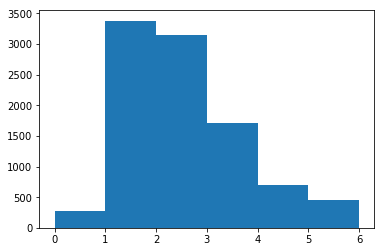

In [186]:
plt.hist(df_hits.nhits, bins = range(7))

In [187]:
def rh_filter_pos(rh_row, layer = 1):
    select = (rh_row.rechit_layer == layer)
    select &= rh_row.rechit_energy > 0.4
    return select[0]

In [188]:
df_hits.apply(rh_filter_pos, axis=1)[:10]

0    False
1     True
2    False
3     True
4    False
5    False
6     True
7     True
8     True
9    False
dtype: bool

In [189]:
df_hits[:2]

,rechit_skiroc,rechit_channel,rechit_x,rechit_y,rechit_energy,rechit_layer,nhits
0,"[3, 0, 5, 7, 4, 4, 7, 4, 4, 4, 4, 7, 7, 7, 7, ...","[36, 18, 34, 20, 26, 24, 18, 30, 28, 22, 34, 3...","[1.000202e-05, -1.9488935, 1.000202e-05, -0.97...","[1.12519, 1.0003498e-05, 1.12519, -5.06339, 1....","[0.35155967, 0.39493895, 0.49695483, 1.9753718...","[1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",2
1,"[1, 1, 2, 6, 7, 4, 7, 4, 7, 5, 11, 11, 11, 11,...","[8, 44, 38, 36, 56, 26, 18, 28, 32, 44, 36, 38...","[9.989902e-06, 2.9233453, 0.97444177, 1e-05, -...","[-5.62599, -2.81299, 0.56259, 1e-05, -2.81299,...","[0.5169128, 1.070182, 0.35918677, 1.1010299, 1...","[1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...",3


In [190]:
for branch in hits_branches:
    print branch

rechit_skiroc
rechit_channel
rechit_x
rechit_y
rechit_energy
rechit_layer


In [191]:
def rh_filter(rh_row, branch, layer = 1):
    select = (rh_row.rechit_layer == layer)
    select &= rh_row.rechit_energy > 0.3
    return getattr(rh_row, branch)

In [192]:
df_hits.apply(lambda row: rh_filter(row, branch = 'rechit_energy'), axis=1)

ValueError: Shape of passed values is (10056, 29), indices imply (10056, 7)

In [157]:
df_tracks[:2]

,ntracks,impactX_HGCal_layer_1,impactY_HGCal_layer_1
0,0,[-5.3245564],[-1.2472391]
1,0,[0.63384724],[2.4550781]


In [158]:
len(df_info)

10056

In [159]:
len(df_hits)

10056

In [160]:
len(df_tracks)

10056

In [161]:
df_tracks = pd.concat([df_info, df_tracks], axis=1, join_axes=[df_info.index])

In [162]:
df_all = pd.concat([df_hits, df_tracks], axis=1, join_axes=[df_hits.index])

In [163]:
df_all[:3]

,rechit_skiroc,rechit_channel,rechit_x,rechit_y,rechit_energy,rechit_layer,nhits,run,event,PI_positionX,PI_positionY,ntracks,impactX_HGCal_layer_1,impactY_HGCal_layer_1
0,"[3, 0, 5, 7, 4, 4, 7, 4, 4, 4, 4, 7, 7, 7, 7, ...","[36, 18, 34, 20, 26, 24, 18, 30, 28, 22, 34, 3...","[1.000202e-05, -1.9488935, 1.000202e-05, -0.97...","[1.12519, 1.0003498e-05, 1.12519, -5.06339, 1....","[0.35155967, 0.39493895, 0.49695483, 1.9753718...","[1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",2,0,0,0.0,0.0,0,[-5.3245564],[-1.2472391]
1,"[1, 1, 2, 6, 7, 4, 7, 4, 7, 5, 11, 11, 11, 11,...","[8, 44, 38, 36, 56, 26, 18, 28, 32, 44, 36, 38...","[9.989902e-06, 2.9233453, 0.97444177, 1e-05, -...","[-5.62599, -2.81299, 0.56259, 1e-05, -2.81299,...","[0.5169128, 1.070182, 0.35918677, 1.1010299, 1...","[1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...",3,0,0,0.0,0.0,0,[0.63384724],[2.4550781]
2,"[3, 3, 5, 4, 7, 4, 4, 7, 7, 7, 5, 7, 11, 11, 1...","[18, 16, 18, 26, 18, 30, 28, 32, 30, 28, 12, 2...","[-1.9488935, -3.897797, 1.0006059e-05, -0.9744...","[5.62599, 5.62599, 3.3755898, 1.6877899, -5.62...","[0.36451125, 0.41558436, 0.45885077, 5.7964635...","[1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...",2,0,0,0.0,0.0,0,[5.841098],[2.234633]


In [164]:
selection = df_all.ntracks == 1
#selection &= df_all.nhits == 1

In [165]:
df_all = df_all[selection]

(array([0., 0., 0., 0., 0., 0.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

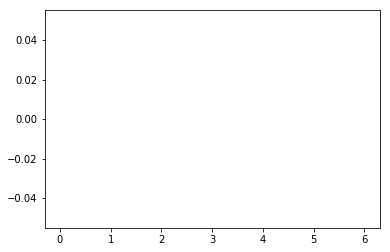

In [166]:
plt.hist(df_all.nhits, bins = range(7))

In [132]:
df_all[:2]

,rechit_skiroc,rechit_channel,rechit_x,rechit_y,rechit_energy,rechit_layer,nhits,run,event,PI_positionX,PI_positionY,ntracks,impactX_HGCal_layer_1,impactY_HGCal_layer_1,impact_x,impact_y
2,"[3, 3, 5, 4, 7, 4, 4, 7, 7, 7, 5, 7, 11, 11, 1...","[18, 16, 18, 26, 18, 30, 28, 32, 30, 28, 12, 2...","[-101.26478, -103.213684, -99.31588, -100.2903...","[-94.050545, -94.050545, -96.30095, -97.98875,...","[0.36451125, 0.41558436, 0.45885077, 5.7964635...","[1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...",1,1222,3,0,0,1,[5.841098],[2.234633],-993.158902,-996.765367
4,"[0, 0, 1, 4, 7, 4, 4, 7, 7, 6, 7, 11, 11, 11, ...","[28, 18, 48, 26, 18, 30, 28, 14, 30, 40, 26, 3...","[-102.48834, -102.48834, -95.667206, -101.5138...","[-102.121185, -99.87079, -103.80898, -98.18301...","[0.39379656, 1.1645092, 0.37394753, 4.766571, ...","[1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, ...",1,1222,5,0,0,1,[-6.394548],[0.2920332],-1005.394548,-998.707967


In [131]:
df_all.apply(rh_filter_pos, axis=1)[:2]

2    False
4    False
dtype: bool

In [106]:
## convert Series to float for impact position (take first element, which for ntracks=1 is the only one)
impact_x = df_all.apply(lambda row: row.impactX_HGCal_layer_1[0], axis=1)
impact_y = df_all.apply(lambda row: row.impactY_HGCal_layer_1[0], axis=1)

In [107]:
df_all.loc[impact_x.index, 'impact_x'] = impact_x
df_all.loc[impact_y.index, 'impact_y'] = impact_y

In [108]:
df_all[:2]

,rechit_skiroc,rechit_channel,rechit_x,rechit_y,rechit_energy,rechit_layer,nhits,run,event,PI_positionX,PI_positionY,ntracks,impactX_HGCal_layer_1,impactY_HGCal_layer_1,impact_x,impact_y
2,"[3, 3, 5, 4, 7, 4, 4, 7, 7, 7, 5, 7, 11, 11, 1...","[18, 16, 18, 26, 18, 30, 28, 32, 30, 28, 12, 2...","[-1.9488935, -3.897797, 1.0006059e-05, -0.9744...","[5.62599, 5.62599, 3.3755898, 1.6877899, -5.62...","[0.36451125, 0.41558436, 0.45885077, 5.7964635...","[1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...",1,1222,3,-999.0,-999.0,1,[5.841098],[2.234633],5.841098,2.234633
4,"[0, 0, 1, 4, 7, 4, 4, 7, 7, 6, 7, 11, 11, 11, ...","[28, 18, 48, 26, 18, 30, 28, 14, 30, 40, 26, 3...","[-1.9488935, -1.9488935, 4.8722486, -0.9744417...","[-2.2503898, 1.0003498e-05, -3.93819, 1.687789...","[0.39379656, 1.1645092, 0.37394753, 4.766571, ...","[1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, ...",1,1222,5,-999.0,-999.0,1,[-6.394548],[0.2920332],-6.394548,0.292033


In [109]:
df_all['impact_x'] = df_all.impact_x + df_all.PI_positionX
df_all['impact_y'] = df_all.impact_y + df_all.PI_positionY

In [110]:
df_all.PI_positionX = df_all.apply(lambda row: max(row.PI_positionX,0), axis=1)
df_all.PI_positionY = df_all.apply(lambda row: max(row.PI_positionY,0), axis=1)

In [111]:
df_all.rechit_x += df_all.impact_x/10.
df_all.rechit_y += df_all.impact_y/10.

In [112]:
np.concatenate(list(df_all.rechit_x))

array([-101.26478 , -103.213684,  -99.31588 , ...,  -99.00931 ,
       -100.95819 ,  -96.08595 ], dtype=float32)

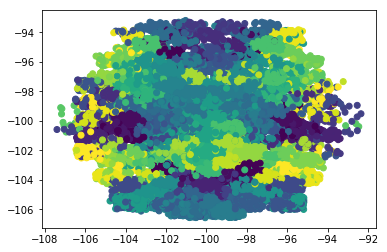

In [113]:
plt.scatter(np.concatenate(list(df_all.rechit_x)),
            np.concatenate(list(df_all.rechit_y)),
            c = np.concatenate(list(df_all.rechit_channel)))

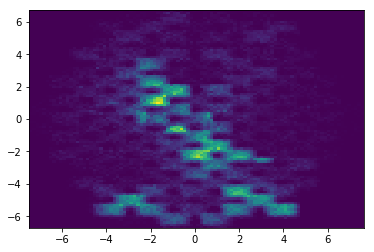

In [27]:
xs, ys = np.concatenate(list(df_all.rechit_x)), np.concatenate(list(df_all.rechit_y))
n, _, _, _ = plt.hist2d(xs, ys, 100)

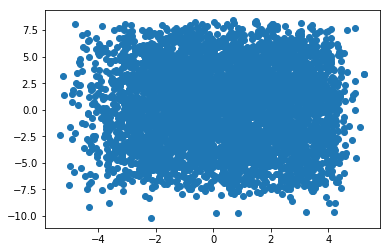

In [28]:
plt.scatter(df_all.impactY_HGCal_layer_1,df_all.impactX_HGCal_layer_1)